# Image Processing SS 20 - Assignment - 10

### Deadline is 01.07.2020 at 11:55 am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [20]:
# display the plots inside the notebook
%matplotlib inline

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.linalg
from skimage.color import rgb2gray
from skimage.data import chelsea
from scipy.fftpack import dct, idct
from numpy.fft import fft2 as numpy_fft2

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Hadamard Matrix - 5 Points

Create a [hadamard matrix](https://en.wikipedia.org/wiki/Hadamard_matrix) of order n and apply it to the chessboard and sinus boards.

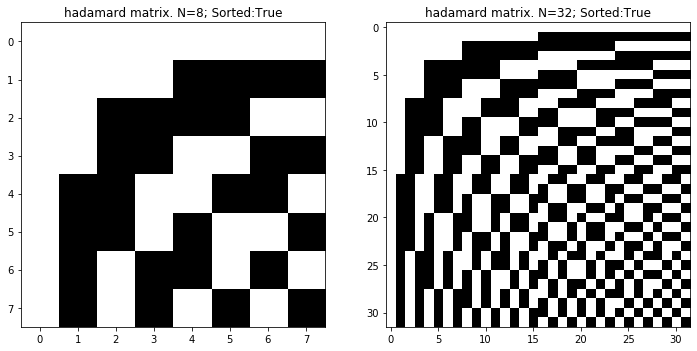

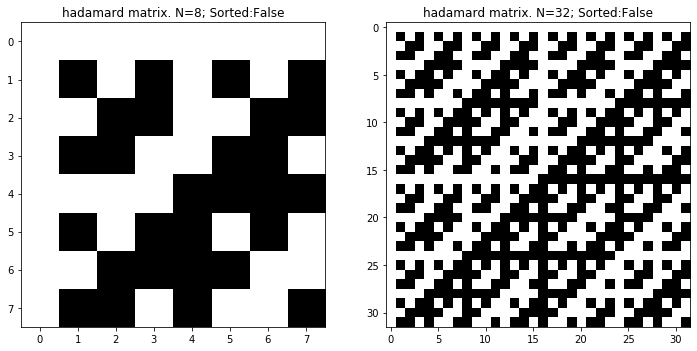

In [22]:
def hadamard_matrix(n, sort=False):


    def calcMatrix(n):
        h1 = np.array([1])
        result =  np.array([[1,1],[1,-1]]) /np.sqrt(2)
        if(n == 1):
            return np.array([1])
        if(n == 2):
            return result
        power = int(np.log2(n)) + 1 
        for i in range(2,power): 
            up = np.concatenate((result,result),axis=1) 
            down = np.concatenate((result, -result),axis=1) 
            result = np.concatenate((up, down) , axis= 0) / np.sqrt(2) 
        return result



    def order(matrix):
            n = matrix.shape[0]
            index = []
            for j,row in enumerate(matrix):
                count = 0
                for i in range(n):
                    if(i == n - 1):
                        continue 
                    if(row[i] != row[i+1]):
                        count +=1
                index.append((j,count))
            dtype = [('index',int), ('count', int)]
            lis = np.sort(np.array(index,dtype=dtype) , order='count')
            result = matrix.copy()
            for i,v in enumerate(lis):
                result[i] = matrix[v[0]]             
            return result



    if(sort):
        return order(calcMatrix(n))
    else:
        return calcMatrix(n)

val = [True,False]
for i in val:
    plt.subplot(121)
    plt.title('hadamard matrix. N=8; Sorted:' + str(i))
    plt.imshow(hadamard_matrix(8,i), cmap='gray')
    plt.subplot(122)
    plt.title('hadamard matrix. N=32; Sorted:' + str(i))
    plt.imshow(hadamard_matrix(32,i), cmap='gray')
    plt.show()

In [23]:
def get_chess_board(n=8, field_size=8):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board

def get_sinus_board(n=8, field_size=8, shift=0):
    img_size = n*field_size
    linsp = np.linspace(-shift, np.pi*n - shift, img_size).reshape((img_size, 1))
    return np.dot(np.sin(linsp), np.sin(linsp.T))



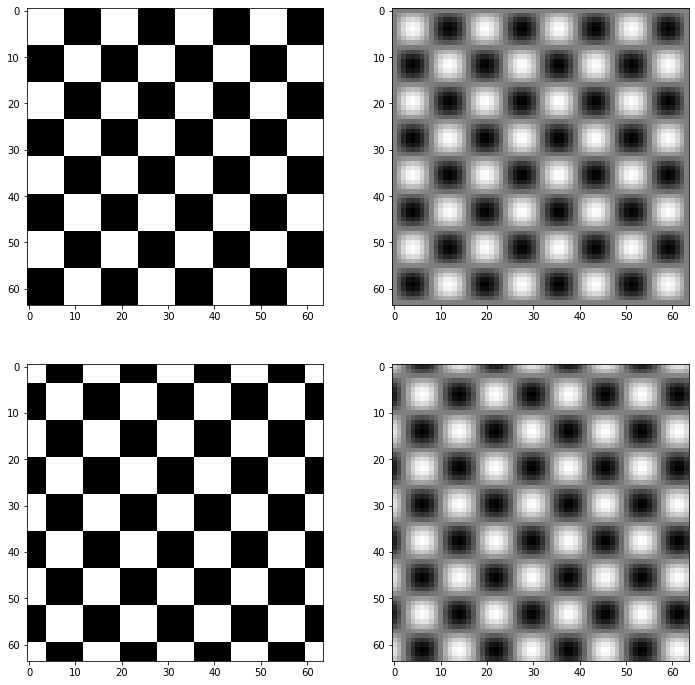

In [24]:
chess_board = get_chess_board()
chess_board_roll = np.roll(np.roll(chess_board, 4, axis=0), 4, axis=1)
sinus_board = get_sinus_board()
sinus_board_roll = get_sinus_board(shift=4)
plt.subplot(221)
plt.imshow(chess_board, cmap='gray', interpolation='nearest')
plt.subplot(222)
plt.imshow(sinus_board, cmap='gray')
plt.subplot(223)
plt.imshow(chess_board_roll, cmap='gray', interpolation='nearest')
plt.subplot(224)
plt.imshow(sinus_board_roll, cmap='gray')
plt.show()

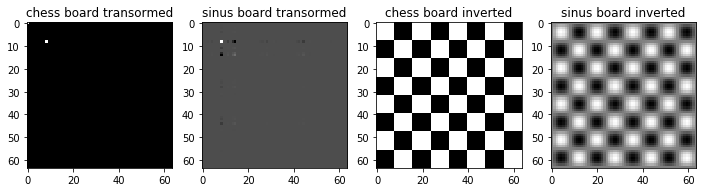

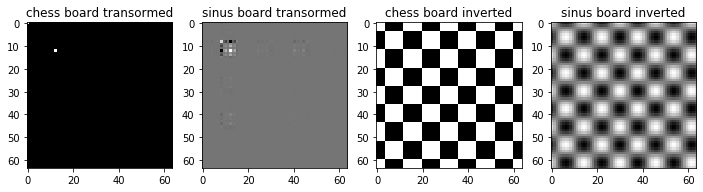

In [31]:
# Plot the 2d hadamard transformation of the chess boards and sinus boards.
# The 2D Hadamard Transformation can be computed similar to the 2D DFT:
# H * I * H, where I is the image, H is the hadamard-matrix and * is the matrix multiplication.

H = hadamard_matrix(64)

chess_board_H = H @ chess_board @ H                    # your code here
chess_board_roll_H = H@chess_board_roll @H
sinus_board_H = H @ sinus_board @ H
sinus_board_roll_H = H @ sinus_board_roll @ H

plt.subplot(141)
plt.title('chess board transormed')
plt.imshow(chess_board_H, cmap='gray', interpolation='nearest')
plt.subplot(142)
plt.title('sinus board transormed')
plt.imshow(sinus_board_H, cmap='gray')
plt.subplot(143)
plt.title('chess board inverted')
plt.imshow(np.linalg.inv(H) @ chess_board_H @ np.linalg.inv(H)  , cmap='gray', interpolation='nearest')
plt.subplot(144)
plt.title('sinus board inverted')
plt.imshow(np.linalg.inv(H) @ sinus_board_H @ np.linalg.inv(H), cmap='gray')
plt.show()

plt.subplot(141)
plt.title('chess board transormed')
plt.imshow(chess_board_roll_H, cmap='gray', interpolation='nearest')
plt.subplot(142)
plt.title('sinus board transormed')
plt.imshow(sinus_board_roll_H, cmap='gray')
plt.subplot(143)
plt.title('chess board inverted')
plt.imshow(np.linalg.inv(H) @ chess_board_roll_H @ np.linalg.inv(H)  , cmap='gray', interpolation='nearest')
plt.subplot(144)
plt.title('sinus board inverted')
plt.imshow(np.linalg.inv(H) @ sinus_board_roll_H @ np.linalg.inv(H), cmap='gray')
plt.show()

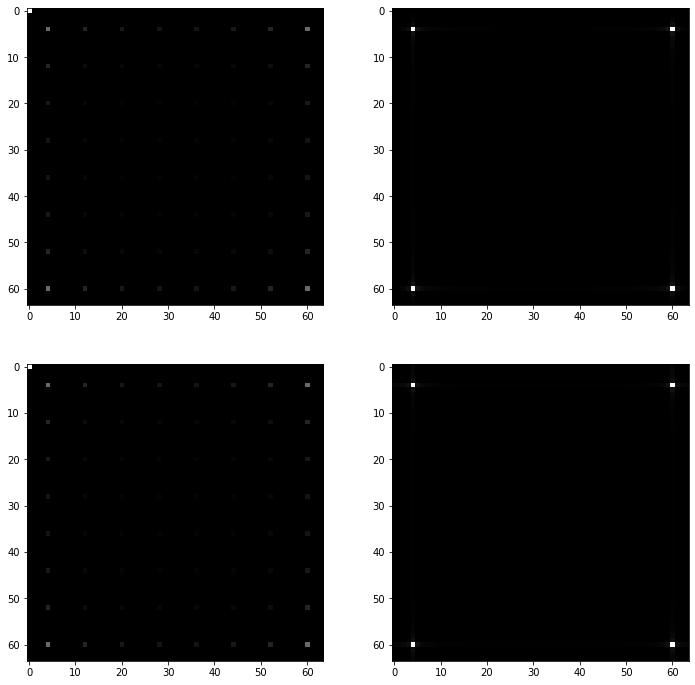

In [32]:
# Plot the fourier transformation of chess boards and sinus boards. 
# You can use some functions from np.ftt
chess_board_ft = abs(np.fft.fft2(chess_board))
chess_board_roll_ft = abs(np.fft.fft2(chess_board_roll))
sinus_board_ft = abs(np.fft.fft2(sinus_board))
sinus_board_roll_ft = abs(np.fft.fft2(sinus_board_roll))

plt.subplot(221)
plt.imshow(chess_board_ft.real, cmap='gray', interpolation='nearest')
plt.subplot(222)
plt.imshow(sinus_board_ft.real, cmap='gray')
plt.subplot(223)
plt.imshow(chess_board_roll_ft.real, cmap='gray', interpolation='nearest')
plt.subplot(224)
plt.imshow(sinus_board_roll_ft.real, cmap='gray')
plt.show()

# Exercise 2 - Compare DCT with Discrete Hadamard Transformation - 5 Points
## This assignment uses solutions from the last assignment. We will update this assignment on Wednesday.

Transform the cat image with DCT and WHT (Walsh Hadamard Transformation).
Erase **75 percent** of coefficients. For DCT you can set the last 75% of the ZigZag Ordering to 0. For Hadamard you have to bring the matrices into [sequence ordering](http://fourier.eng.hmc.edu/e161/lectures/wht/node3.html) first and then erase from the ZigZag Ordering.

Transform back into image space and calculate the average quadratic pixel error w.r.t. the original image. 

Plot window size vs DCT and Hadamard and show the MSE error for WindowSizes 8x8, 32x32, 64x64, 128x128 and 256x256
for DCT and DWalHadT respectively.

In [27]:
class Blocks:
    """Transforms an image to blocks. A (512, 512) image will become an (64, 64, 8, 8) numpy array"""
    def __init__(self, block_size=8):
        self.block_size = block_size

    def __call__(self, img):
        b = self.block_size
        height, width = img.shape

        assert img.shape[0] % b == 0
        assert img.shape[1] % b == 0
        blocks = np.zeros((height // b, width // b, b, b), dtype=img.dtype)
        for i in range(0, height // b):
            for j in range(0, width // b):
                blocks[i, j] = img[i*b:(i+1)*b, j*b:(j+1)*b]
        return blocks
    def invert(self, blocks):
        bh, bw = blocks.shape[:2]
        b = self.block_size
        heigth, width = (bh*self.block_size, bw*self.block_size)

        img = np.zeros((heigth, width), dtype=blocks.dtype)
        for i in range(0, bh):
            for j in range(0, bw):
                img[i*b:(i+1)*b, j*b:(j+1)*b] = blocks[i, j]
        return img

In [28]:
class DCTofBlocks:
    def __call__(self, blocks):
        """Returns the DCT of the blocks. The position (i, j) is a 2-dim numpy array with the dct coefficents."""
        # you can use any function from np.fft or scipy.fftpack
        # your code here 
 
        x ,y = blocks.shape[0], blocks.shape[1]
        result = np.zeros_like(blocks)
        for i in range(x):
            for j in range(y):
                result[i,j] = dct(dct(blocks[i,j].T, norm='ortho').T, norm='ortho') # dct-II ortho
        return result.astype( blocks.dtype)
    
    def invert(self, blocks):
        """Computes the inverse DCT."""
        # you can use any function from np.fft or scipy.fftpack
        # your code here 
        result = np.zeros_like(blocks)
        x ,y = blocks.shape[0], blocks.shape[1]
        for i in range(x):
            for j in range(y):
                result[i,j] = idct(idct(blocks[i,j].T, norm='ortho').T, norm='ortho')
        return result.astype(blocks.dtype) 

In [29]:
class HadamardofBlocksSequenceOrdering:
    def __call__(self, blocks):
        """Returns the DCT of the blocks. The position (i, j) is a 2-dim numpy array with the dct coefficents."""
        # you can use any function from np.fft or scipy.fftpack
        h = hadamard_matrix(blocks.shape[3],sort=True)
        # reorder h into sequence ordering
        # apply h to block
        result = blocks.copy()
        x,y = result.shape[0],result.shape[1]
        for i in range(x):
            for j in range(y):
                result[i,j]= h @ blocks[i,j] @ h
        return result

    def invert(self, blocks):
        """Computes the inverse DCT."""
        # you can use any function from np.fft or scipy.fftpack
        h = hadamard_matrix(blocks.shape[3],sort=True)
        result = blocks.copy()
        x,y = result.shape[0],result.shape[1]
        for i in range(x):
            for j in range(y):
                result[i,j]= np.linalg.inv(h)  @ blocks[i,j] @ np.linalg.inv(h)
        return result

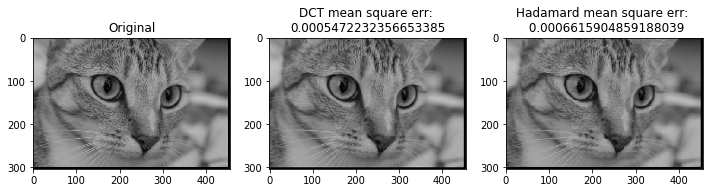

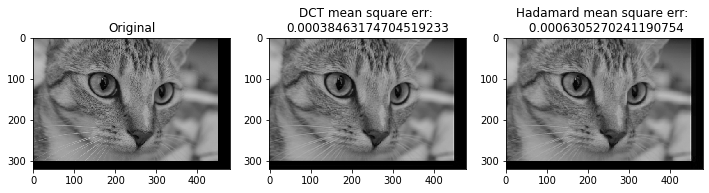

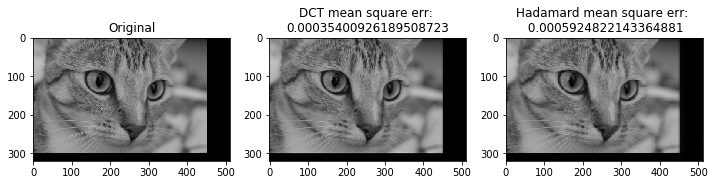

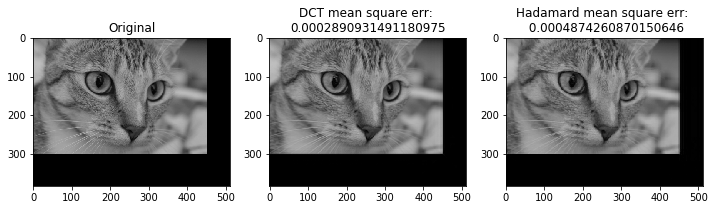

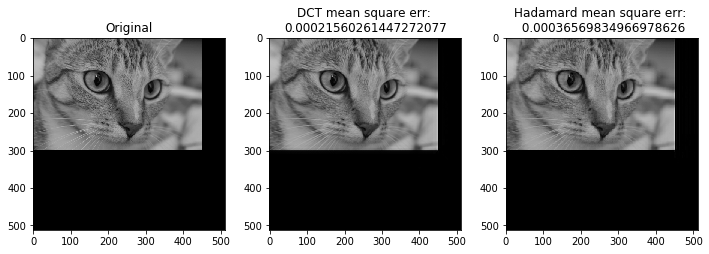

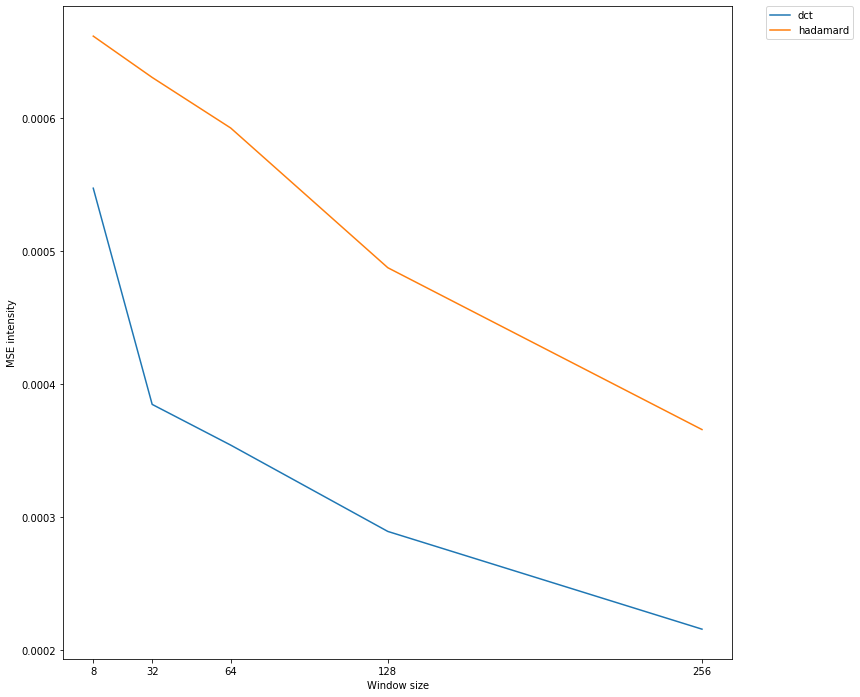

In [30]:
class PickNZigZag:
    def __init__(self, n = 1,pick = 1): 
        self.pick = pick 
        self.n = n
        """Adapted from here: https://rosettacode.org/wiki/Zig-zag_matrix#Python"""
        def key(pair):
            x, y = pair
            return x+y, -y if (x+y) % 2 else y
        indexorder = sorted(((x,y) for x in range(self.n) for y in range(self.n)), key=key)
        self.xs = np.zeros((self.n**2,), dtype=np.int)
        self.ys = np.zeros((self.n**2,), dtype=np.int)
        self.back = np.zeros((self.n, self.n), dtype=np.int)
        for i, (x, y) in enumerate(indexorder):
            self.xs[i] = x
            self.ys[i] = y
            self.back[x, y] = i
            
    def __call__(self, blocks):
        bh, bw, h, w = blocks.shape
        zigzack = np.zeros((bh, bw, h*w), dtype=blocks.dtype)
        result = np.zeros_like(blocks, dtype=blocks.dtype)
        for i, block_row in enumerate(blocks):
            for j, block in enumerate(block_row):
                zigzack[i, j] = block[self.xs, self.ys]
                lis = np.zeros(zigzack[i, j].shape)
                lis[:self.pick] = zigzack[i, j][:self.pick]
                zigzack[i, j] = lis
 
        for i, zigzack_row in enumerate(zigzack):
            for j, lis in enumerate(zigzack_row):
                result[i, j] = lis[self.back] 
        return result

    def invert(self, blocks):
        """There is no way to invert this operation. Just return the inputs."""
        return blocks

img = rgb2gray(chelsea()) 
sizes = [8, 32, 64, 128, 256]
rms_dct_arr = []
rms_hadamard_arr = []
for size in sizes:
    # pad image for blocking
    pad_x = 0 if img.shape[0] % size == 0 else (img.shape[0] // size + 1) * size - img.shape[0]
    pad_y = 0 if img.shape[1] % size == 0 else (img.shape[1] // size + 1) * size - img.shape[1]
    img_pad = np.pad(img, ((0, pad_x), (0, pad_y)))

    blocks = Blocks(block_size=size)(img_pad)
    dct_blocks = DCTofBlocks()(blocks.copy())
    hadamard_blocks = HadamardofBlocksSequenceOrdering()(blocks.copy())


    dct_highest      = PickNZigZag( size, size ** 2 // 4)(dct_blocks)
    hadamard_highest = PickNZigZag( size,size ** 2 // 4) (hadamard_blocks)

    dct_img = Blocks(block_size=size).invert(DCTofBlocks().invert(dct_highest))
    hadamard_img = Blocks(block_size=size).invert(HadamardofBlocksSequenceOrdering().invert(hadamard_highest))

    mse_dct = ((img_pad - dct_img)**2.0).mean(axis=None)
    mse_hadamard = ((img_pad - hadamard_img)**2.0).mean(axis=None)

    rms_dct_arr.append(mse_dct)
    rms_hadamard_arr.append(mse_hadamard)

    plt.subplot(331)
    plt.title("Original")
    plt.imshow(img_pad, cmap='gray', vmin=0, vmax=1)
    plt.subplot(332)
    plt.title("DCT mean square err: \n" + str(mse_dct))
    plt.imshow(dct_img, cmap='gray', vmin=0, vmax=1)
    plt.subplot(333)
    plt.title("Hadamard mean square err: \n " + str(mse_hadamard))
    plt.imshow(hadamard_img, cmap='gray', vmin=0, vmax=1)
    plt.show()

plt.plot(sizes, rms_dct_arr, label="dct")
plt.plot(sizes, rms_hadamard_arr, label="hadamard")
plt.ylabel("MSE intensity")
plt.xlabel("Window size")
plt.xticks(sizes)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()